# Diabetes Prediction using K-Nearest Neighbors (KNN)

### Objective:
Predict whether a patient has diabetes using the `diabetes.csv` dataset and K-Nearest Neighbors (KNN) algorithm.

### Steps:
1. Load and inspect the dataset
2. Preprocess the data if necessary
3. Split the data into training and test sets
4. Train a KNN classifier
5. Evaluate the model: confusion matrix, accuracy, error rate, precision, recall
6. Experiment with different values of `k` to improve results

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### Step 1: Load the dataset

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Step 2: Preprocessing
- Check for missing values
- Replace invalid zeros in certain columns with median values
- Split features and target

In [9]:
# Check for missing values
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [11]:
# Columns where zero is invalid and should be replaced
zero_invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Replace zeros with median values in these columns
for col in zero_invalid_cols:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)


In [12]:
# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Train K-Nearest Neighbors Classifier
- Experiment with different values of `k` and distance metrics to find the best accuracy.

In [14]:
# Define parameters to experiment
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
minkowski_p = 3  # for Minkowski distance

# Dictionary to store results
knn_results = {}

for metric in distance_metrics:
    for k in k_values:
        if metric == 'minkowski':
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric, p=minkowski_p)
        else:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        
        # Store metrics
        knn_results[(metric, k)] = {
            "accuracy": accuracy_score(y_test, y_pred),
            "error_rate": 1 - accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred),
            "confusion_matrix": confusion_matrix(y_test, y_pred)
        }
        
        # Print metrics
        print(f"\nKNN with k={k}, metric={metric}")
        print(f"Accuracy: {knn_results[(metric, k)]['accuracy']:.3f}")
        print(f"Error Rate: {knn_results[(metric, k)]['error_rate']:.3f}")
        print(f"Precision: {knn_results[(metric, k)]['precision']:.3f}")
        print(f"Recall: {knn_results[(metric, k)]['recall']:.3f}")
        print(f"F1-score: {knn_results[(metric, k)]['f1_score']:.3f}")
        print("Confusion Matrix:\n", knn_results[(metric, k)]['confusion_matrix'])



KNN with k=3, metric=euclidean
Accuracy: 0.701
Error Rate: 0.299
Precision: 0.587
Recall: 0.500
F1-score: 0.540
Confusion Matrix:
 [[81 19]
 [27 27]]

KNN with k=5, metric=euclidean
Accuracy: 0.708
Error Rate: 0.292
Precision: 0.596
Recall: 0.519
F1-score: 0.554
Confusion Matrix:
 [[81 19]
 [26 28]]

KNN with k=7, metric=euclidean
Accuracy: 0.695
Error Rate: 0.305
Precision: 0.574
Recall: 0.500
F1-score: 0.535
Confusion Matrix:
 [[80 20]
 [27 27]]

KNN with k=3, metric=manhattan
Accuracy: 0.734
Error Rate: 0.266
Precision: 0.627
Recall: 0.593
F1-score: 0.610
Confusion Matrix:
 [[81 19]
 [22 32]]

KNN with k=5, metric=manhattan
Accuracy: 0.753
Error Rate: 0.247
Precision: 0.682
Recall: 0.556
F1-score: 0.612
Confusion Matrix:
 [[86 14]
 [24 30]]

KNN with k=7, metric=manhattan
Accuracy: 0.721
Error Rate: 0.279
Precision: 0.628
Recall: 0.500
F1-score: 0.557
Confusion Matrix:
 [[84 16]
 [27 27]]

KNN with k=3, metric=minkowski
Accuracy: 0.695
Error Rate: 0.305
Precision: 0.578
Recall: 0.4

### Step 4: Visualize Model Performance
- Compare accuracy, precision, recall, and F1-score for all combinations of `k` and distance metrics.


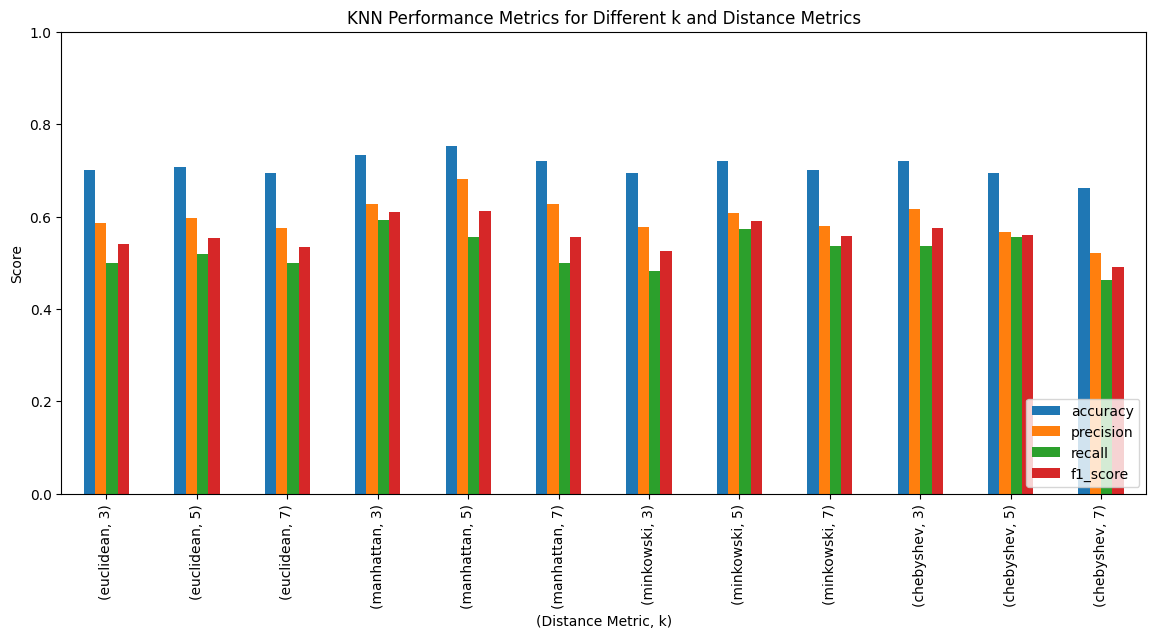

In [15]:
# Convert results to DataFrame for plotting
results_df = pd.DataFrame(knn_results).T  # transpose so (metric, k) is index
results_df[['accuracy', 'precision', 'recall', 'f1_score']].plot(
    kind='bar', figsize=(14,6)
)
plt.title("KNN Performance Metrics for Different k and Distance Metrics")
plt.xlabel("(Distance Metric, k)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()